In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import PIL #install with "pip install pillow", verify with "python3 -m PIL"
from PIL import Image,ImageFilter,ImageDraw,ImageEnhance #Image class used for all images
import os, sys
import numpy as np

This is a program showcasing the functionality of the Pillow library


In [2]:
#image_name = input("Enter the name of the image file.")
image_name = "image.jpg"
filepath = os.path.join(os.getcwd(),image_name)
try:
    im = Image.open(filepath)
    print(f"Image - {filepath}")
    print(f"Format - {im.format}")
    print(f"Size - {im.size} - {im.width} x {im.height}")
    print(f"Mode - {im.mode}")
    print(f"Bands - {im.getbands()}")
    print(f"Bounds - {im.getbbox()}")
except OSError:
    print(f"Unable to open image {filepath}.")
    im = Image.new(mode="RGB",size=(400,300),color=(120,233,122))
grid_name = "grid.png"
gridpath = os.path.join(os.getcwd(),grid_name)
try:
    imgrid = Image.open(gridpath).convert("RGBA")
    print(f"Image - {gridpath}")
    print(f"Format - {imgrid.format}")
    print(f"Size - {imgrid.size} - {imgrid.width} x {imgrid.height}")
    print(f"Mode - {imgrid.mode}")
    print(f"Bands - {imgrid.getbands()}")
    print(f"Bounds - {imgrid.getbbox()}")
except OSError:
    print(f"Unable to open image {filepath}.")
    imgrid = Image.new(mode="RGBA",size=(400,300),color=(120,233,122))
im.save("image.png")
imgrid.save("grid.png")


Image - C:\Users\Migui\Desktop\pillowtest\image.jpg
Format - JPEG
Size - (268, 257) - 268 x 257
Mode - RGB
Bands - ('R', 'G', 'B')
Bounds - (0, 0, 268, 257)
Image - C:\Users\Migui\Desktop\pillowtest\grid.png
Format - None
Size - (300, 300) - 300 x 300
Mode - RGBA
Bands - ('R', 'G', 'B', 'A')
Bounds - (0, 0, 300, 300)


In [3]:
im.show()
imlow = im.copy()
imlow.thumbnail((128,128),resample=Image.Resampling.BOX)
imlow.show()
imlow.save("thumbnail.png")
imcomp = im.copy()
imcomp.paste(imgrid,(100,50))
imcomp.show()
imcomp.save("blackgrid.png")
imgrid2 = Image.new(mode="RGBA",size=im.size,color=(0,0,0,0))
imgrid2.paste(imgrid,(100,50))
imcomp2 = Image.alpha_composite(im.copy().convert("RGBA"),imgrid2)
imcomp2.show()
imcomp2.save("cleargrid.png")
imarr = np.asarray(im).copy()
print(imarr.shape)
for i in range(imarr.shape[0]):
    for j in range(imarr.shape[1]):
        if (i > imarr.shape[0]/3 and i < imarr.shape[0]*2/3) and (j > imarr.shape[1]/3 and j < imarr.shape[1]*2/3):
            imarr[i,j,0],imarr[i,j,1],imarr[i,j,2], = imarr[i,j,1],imarr[i,j,2],imarr[i,j,0]
im2 = Image.fromarray(imarr)
im2.show()
im2.save("bluebox.png")
immask = Image.new(mode="RGBA",size=im.size,color=(127,37,212,255))
immask.show()
immask.save("box.png")
imnoise = Image.effect_noise(im.size,1)
im2.save("compressed1.jpg",quality=90)
im2.save("compressed2.jpg",quality=50)
im2.save("compressed3.jpg",quality=30)
im3=Image.open(os.path.join(os.getcwd(),"compressed3.jpg"))

(257, 268, 3)


In [4]:
imdraw = Image.new(mode="RGBA",size=(512,700),color=(127,37,212,255))
draw = ImageDraw.Draw(imdraw)
print(draw.getfont())
draw.line((10, 10, 500, 500),fill=128,width=3)
draw.arc(((30,10),(100,30)),start=50,end=10,fill=128,width=3)
draw.chord(((70,310),(300,10)),start=45,end=10,outline=155,fill=(177,23,220),width=3)
draw.ellipse((300,400,500,600),outline=(122,33,41),fill=(177,23,220),width=3)
draw.rectangle((100,100,200,200),outline=(122,33,41),fill=(177,23,220),width=3)
draw.rounded_rectangle((100,300,200,400),radius=10,outline=(122,33,41),fill=125,width=3)
draw.text((10,20),text="This is a text of letter gibberish",fill=(255,0,0))
imdraw.show()

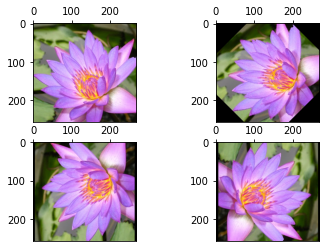

In [5]:
fig,axs = plt.subplots(2,2)
for ax in axs.flat:
    ax.xaxis.tick_top()
    ax.invert_yaxis()
axs[0,0].imshow(im) #original image
axs[0,1].imshow(im.rotate(45)) #rotated image
axs[1,0].imshow(im.rotate(90)) #rotated image
axs[1,1].imshow(im.rotate(-90)) #rotated image

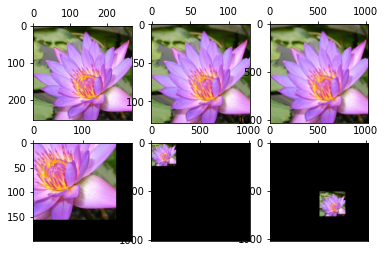

In [6]:
fig,axs = plt.subplots(2,3)
for ax in axs.flat:
    ax.xaxis.tick_top()
    ax.invert_yaxis()
axs[0,0].imshow(im) #original image
axs[0,1].imshow(im.resize((128,128))) #resized image
im.resize((128,128)).save("shrink.png")
axs[0,2].imshow(im.resize((128,128)).resize((1024,1024))) #resized image
im.resize((128,128)).resize((1024,1024)).save("enlarge.png")
axs[1,0].imshow(im.crop((100,100,300,300))) #cropped image
im.crop((100,100,300,300)).save("crop1.png")
axs[1,1].imshow(im.crop((10,10,1024,1024))) #cropped image
im.crop((10,10,1024,1024)).save("crop2.png")
axs[1,2].imshow(im.crop((-512,-512,512,512))) #cropped image
im.crop((-512,-512,512,512)).save("crop3.png")

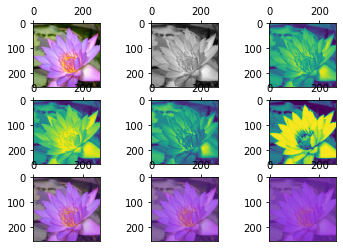

In [7]:
fig,axs = plt.subplots(3,3)
for ax in axs.flat:
    ax.xaxis.tick_top()
    ax.invert_yaxis()
axs[0,0].imshow(im) #original image
axs[0,1].imshow(im.convert("1")) #grayscale
im.convert("1").save("gray.png")
axs[0,2].imshow(im.convert("L")) #8channel
im.convert("L").save("eight.png")
axs[1,0].imshow(im.getchannel("R")) #extract red channel
im.getchannel("R").save("redchannel.png")
axs[1,1].imshow(im.getchannel("G")) #extract green channel
im.getchannel("G").save("green.png")
axs[1,2].imshow(im.getchannel("B")) #extract blue channel
im.getchannel("B").save("blue.png")
axs[2,0].imshow(Image.blend(im.convert("RGBA"),immask,0.3)) #blend red and red channel (in green)
axs[2,1].imshow(Image.blend(im.convert("RGBA"),immask,0.5)) #blend red and red channel (in green)
axs[2,2].imshow(Image.blend(im.convert("RGBA"),immask,0.7)) #blend red and red channel (in green)


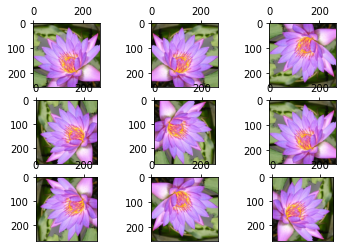

In [8]:
fig,axs = plt.subplots(3,3)
for ax in axs.flat:
    ax.xaxis.tick_top()
    ax.invert_yaxis()
axs[0,0].imshow(im) #original image
axs[0,1].imshow(im.transpose(Image.Transpose.FLIP_LEFT_RIGHT)) #flip along y-axis
axs[0,2].imshow(im.transpose(Image.Transpose.FLIP_TOP_BOTTOM)) #flip along x-axis
axs[1,0].imshow(im.transpose(Image.Transpose.TRANSPOSE)) #extract red channel
axs[1,1].imshow(im.transpose(Image.Transpose.TRANSVERSE)) #extract green channel
axs[1,2].imshow(im.transpose(Image.Transpose.TRANSVERSE).transpose(Image.Transpose.TRANSVERSE)) #extract blue channel
axs[2,0].imshow(im.transpose(Image.Transpose.ROTATE_90)) #extract green channel
axs[2,1].imshow(im.transpose(Image.Transpose.ROTATE_180)) #extract green channel
axs[2,2].imshow(im.transpose(Image.Transpose.ROTATE_270)) #extract blue channel
im.transpose(Image.Transpose.FLIP_LEFT_RIGHT).save("flipy.png")
im.transpose(Image.Transpose.FLIP_TOP_BOTTOM).save("flipx.png")
im.transpose(Image.Transpose.TRANSPOSE).save("transpose.png")
im.transpose(Image.Transpose.TRANSVERSE).save("transverse.png")
im.transpose(Image.Transpose.ROTATE_90).save("rot90.png")
im.transpose(Image.Transpose.ROTATE_180).save("rot180.png")
im.transpose(Image.Transpose.ROTATE_270).save("rot270.png")


(array([42., 49., 33., 18., 17., 12., 14.,  5., 10., 17.,  7.,  4.,  3.,
         3.,  2.,  1.,  1.,  2.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,
         0.,  2.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,
         1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

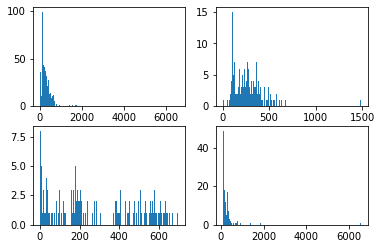

In [9]:
fig,axs = plt.subplots(2,2)
axs[0,0].hist(im.histogram(), bins=256)
axs[0,1].hist(im.getchannel("R").histogram(), bins=256)
axs[1,0].hist(im.getchannel("G").histogram(), bins=256)
axs[1,1].hist(im.getchannel("B").histogram(), bins=256)


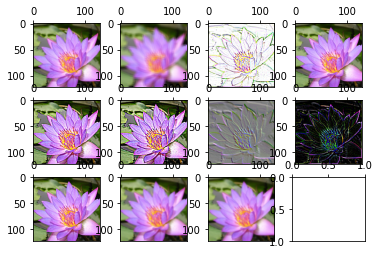

In [10]:
fig,axs = plt.subplots(3,4)
for ax in axs.flat:
    ax.xaxis.tick_top()
    ax.invert_yaxis()
axs[0,0].imshow(imlow) #original image
axs[0,1].imshow(imlow.filter(ImageFilter.BLUR))
axs[0,2].imshow(imlow.filter(ImageFilter.CONTOUR))
axs[0,3].imshow(imlow.filter(ImageFilter.DETAIL))
axs[1,0].imshow(imlow.filter(ImageFilter.EDGE_ENHANCE))
axs[1,1].imshow(imlow.filter(ImageFilter.EDGE_ENHANCE_MORE))
axs[1,2].imshow(imlow.filter(ImageFilter.EMBOSS))
axs[1,3].imshow(imlow.filter(ImageFilter.FIND_EDGES))
axs[2,0].imshow(imlow.filter(ImageFilter.SHARPEN))
axs[2,1].imshow(imlow.filter(ImageFilter.SMOOTH))
axs[2,2].imshow(imlow.filter(ImageFilter.SMOOTH_MORE))

imlow.filter(ImageFilter.BLUR).save("blur.png")
imlow.filter(ImageFilter.CONTOUR).save("contour.png")
imlow.filter(ImageFilter.DETAIL).save("detail.png")
imlow.filter(ImageFilter.EDGE_ENHANCE).save("edge1.png")
imlow.filter(ImageFilter.EDGE_ENHANCE_MORE).save("edge2.png")
imlow.filter(ImageFilter.EMBOSS).save("emboss.png")
imlow.filter(ImageFilter.FIND_EDGES).save("findedge1.png")
imlow.filter(ImageFilter.SHARPEN).save("sharp.png")
imlow.filter(ImageFilter.SMOOTH).save("smooth1.png")
imlow.filter(ImageFilter.SMOOTH_MORE).save("smooth2.png")

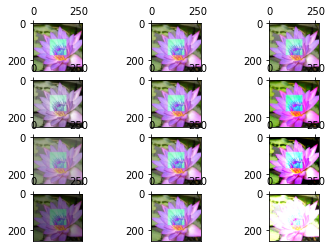

In [11]:
fig,axs = plt.subplots(4,3)
for ax in axs.flat:
    ax.xaxis.tick_top()
    ax.invert_yaxis()
axs[0,0].imshow(ImageEnhance.Sharpness(im3).enhance(0.5))
axs[0,1].imshow(ImageEnhance.Sharpness(im3).enhance(1)) #original image
axs[0,2].imshow(ImageEnhance.Sharpness(im3).enhance(2))
axs[1,0].imshow(ImageEnhance.Color(im3).enhance(0.5))
axs[1,1].imshow(ImageEnhance.Color(im3).enhance(1)) #original image
axs[1,2].imshow(ImageEnhance.Color(im3).enhance(2))
axs[2,0].imshow(ImageEnhance.Contrast(im3).enhance(0.5))
axs[2,1].imshow(ImageEnhance.Contrast(im3).enhance(1)) #original image
axs[2,2].imshow(ImageEnhance.Contrast(im3).enhance(2))
axs[3,0].imshow(ImageEnhance.Brightness(im3).enhance(0.5))
axs[3,1].imshow(ImageEnhance.Brightness(im3).enhance(1)) #original image
axs[3,2].imshow(ImageEnhance.Brightness(im3).enhance(2))
